In [1]:
import numpy
import pandas

from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.constraints import maxnorm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

In [2]:
seed = 9
numpy.random.seed(seed)

In [3]:
dataframe = pandas.read_csv(r"C:\Users\Vikas Salunke\Desktop\Data Science\forestfires.csv")
dataframe

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [5]:
dataframe.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
dataframe.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)
dataframe.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [6]:
 dataframe.describe()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,7.475822,4.259188,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,2.275990,2.072929,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,5.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
dataframe.shape

(517, 31)

In [8]:
 dataframe.dtypes

month              int64
day                int64
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [11]:
dataframe.corr(method='pearson')

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
month,1.000000,-0.050837,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438,...,0.264837,-0.483099,-0.177483,-0.053753,-0.119681,-0.672248,-0.067855,0.068231,0.191895,0.473304
day,-0.050837,1.000000,-0.041068,0.062870,0.000105,0.032909,0.052190,0.092151,0.032478,-0.048340,...,-0.095214,0.028170,0.067430,-0.005016,0.013585,-0.036634,0.037338,-0.048025,-0.032764,-0.022955
FFMC,0.291477,-0.041068,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,...,-0.137044,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609
DMC,0.466645,0.062870,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,...,-0.176301,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907
DC,0.868698,0.000105,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,...,-0.105642,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857
ISI,0.186597,0.032909,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,...,-0.162322,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877
temp,0.368842,0.052190,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,...,-0.329648,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006
RH,-0.095280,0.092151,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,...,-0.047714,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596
wind,-0.086368,0.032478,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,...,0.269702,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476
rain,0.013438,-0.048340,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,...,-0.009752,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733


In [12]:
dataset = dataframe.values


X = dataset[:,0:10]
Y = dataset[:,10]

In [13]:
def model(self,rfe):
    print(rfe)
   
    model= ExtraTreesRegressor(model)
    rfe = RFE(model, 3)
    fit = rfe.fit(X, Y)
    print("Number of Features:" , fit.n_features_)
    print("Selected Features:", fit.support_)
    print("Feature Ranking:" , fit.ranking_) 

(array([508.,   6.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([   0.   ,  109.084,  218.168,  327.252,  436.336,  545.42 ,
         654.504,  763.588,  872.672,  981.756, 1090.84 ]),
 <BarContainer object of 10 artists>)

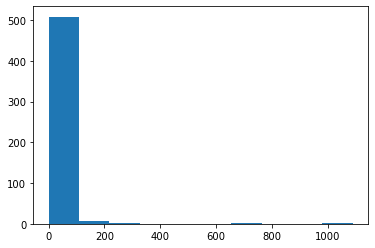

In [14]:
plt.hist((dataframe.area))

array([[<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>],
       [<AxesSubplot:title={'center':'ISI'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'wind'}>,
        <AxesSubplot:title={'center':'rain'}>],
       [<AxesSubplot:title={'center':'area'}>,
        <AxesSubplot:title={'center':'dayfri'}>,
        <AxesSubplot:title={'center':'daymon'}>,
        <AxesSubplot:title={'center':'daysat'}>,
        <AxesSubplot:title={'center':'daysun'}>],
       [<AxesSubplot:title={'center':'daythu'}>,
        <AxesSubplot:title={'center':'daytue'}>,
        <AxesSubplot:title={'center':'daywed'}>,
        <AxesSubplot:title={'center':'monthapr'}>,
        <AxesSubplot:title={'center':'monthaug'}>],
       [<AxesSubplot:title={'center':'mo

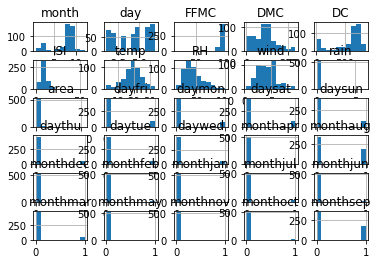

In [15]:
dataframe.hist()

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <Axes

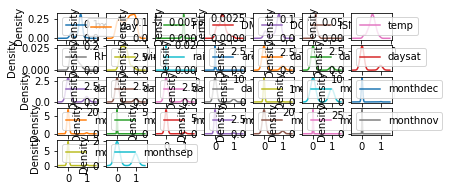

In [22]:
dataframe.plot(kind='density', subplots=True, layout=(7,7), sharex=False, sharey=False)

month         AxesSubplot(0.125,0.808774;0.0731132x0.0712264)
day         AxesSubplot(0.212736,0.808774;0.0731132x0.0712...
FFMC        AxesSubplot(0.300472,0.808774;0.0731132x0.0712...
DMC         AxesSubplot(0.388208,0.808774;0.0731132x0.0712...
DC          AxesSubplot(0.475943,0.808774;0.0731132x0.0712...
ISI         AxesSubplot(0.563679,0.808774;0.0731132x0.0712...
temp        AxesSubplot(0.651415,0.808774;0.0731132x0.0712...
RH          AxesSubplot(0.739151,0.808774;0.0731132x0.0712...
wind        AxesSubplot(0.826887,0.808774;0.0731132x0.0712...
rain          AxesSubplot(0.125,0.723302;0.0731132x0.0712264)
area        AxesSubplot(0.212736,0.723302;0.0731132x0.0712...
dayfri      AxesSubplot(0.300472,0.723302;0.0731132x0.0712...
daymon      AxesSubplot(0.388208,0.723302;0.0731132x0.0712...
daysat      AxesSubplot(0.475943,0.723302;0.0731132x0.0712...
daysun      AxesSubplot(0.563679,0.723302;0.0731132x0.0712...
daythu      AxesSubplot(0.651415,0.723302;0.0731132x0.0712...
daytue  

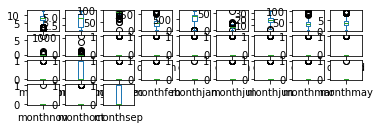

In [21]:
dataframe.plot(kind='box', subplots=True, layout=(9,9), sharex=False, sharey=False)

array([[<AxesSubplot:xlabel='month', ylabel='month'>,
        <AxesSubplot:xlabel='day', ylabel='month'>,
        <AxesSubplot:xlabel='FFMC', ylabel='month'>,
        <AxesSubplot:xlabel='DMC', ylabel='month'>,
        <AxesSubplot:xlabel='DC', ylabel='month'>,
        <AxesSubplot:xlabel='ISI', ylabel='month'>,
        <AxesSubplot:xlabel='temp', ylabel='month'>,
        <AxesSubplot:xlabel='RH', ylabel='month'>,
        <AxesSubplot:xlabel='wind', ylabel='month'>,
        <AxesSubplot:xlabel='rain', ylabel='month'>,
        <AxesSubplot:xlabel='area', ylabel='month'>,
        <AxesSubplot:xlabel='dayfri', ylabel='month'>,
        <AxesSubplot:xlabel='daymon', ylabel='month'>,
        <AxesSubplot:xlabel='daysat', ylabel='month'>,
        <AxesSubplot:xlabel='daysun', ylabel='month'>,
        <AxesSubplot:xlabel='daythu', ylabel='month'>,
        <AxesSubplot:xlabel='daytue', ylabel='month'>,
        <AxesSubplot:xlabel='daywed', ylabel='month'>,
        <AxesSubplot:xlabel='monthapr'

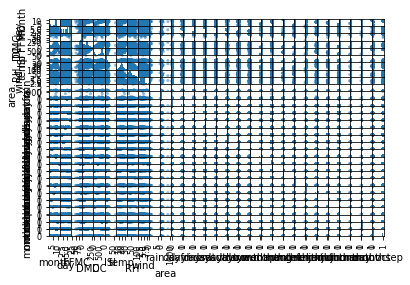

In [23]:
scatter_matrix(dataframe)

[Text(0, 0, 'month'),
 Text(0, 1, 'day'),
 Text(0, 2, 'FFMC'),
 Text(0, 3, 'DMC'),
 Text(0, 4, 'DC'),
 Text(0, 5, 'ISI'),
 Text(0, 6, 'temp'),
 Text(0, 7, 'RH'),
 Text(0, 8, 'wind'),
 Text(0, 9, 'rain'),
 Text(0, 10, 'area'),
 Text(0, 11, 'dayfri'),
 Text(0, 12, 'daymon'),
 Text(0, 13, 'daysat'),
 Text(0, 14, 'daysun'),
 Text(0, 15, 'daythu'),
 Text(0, 16, 'daytue'),
 Text(0, 17, 'daywed'),
 Text(0, 18, 'monthapr'),
 Text(0, 19, 'monthaug'),
 Text(0, 20, 'monthdec'),
 Text(0, 21, 'monthfeb'),
 Text(0, 22, 'monthjan'),
 Text(0, 23, 'monthjul'),
 Text(0, 24, 'monthjun'),
 Text(0, 25, 'monthmar'),
 Text(0, 26, 'monthmay'),
 Text(0, 27, 'monthnov'),
 Text(0, 28, 'monthoct'),
 Text(0, 29, 'monthsep'),
 Text(0, 30, 'size_category')]

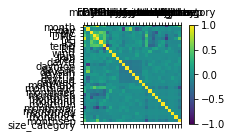

In [25]:
fig = plt.figure()
ax = fig.add_subplot(222)
cax = ax.matshow(dataframe.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,31,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(dataframe.columns)
ax.set_yticklabels(dataframe.columns)

In [26]:
num_instances = len(X)

models = []
models.append(('LiR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('Bag_Re', BaggingRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))


results = []
names = []
scoring = []

for name, model in models:
   
    model.fit(X, Y)
    
    predictions = model.predict(X)
    
   
    score = explained_variance_score(Y, predictions)
    mae = mean_absolute_error(predictions, Y)
    
    results.append(mae)
    names.append(name)
    
    msg = "%s: %f (%f)" % (name, score, mae)
    print(msg)

LiR: 0.018563 (19.280670)
Ridge: 0.018563 (19.279119)
Lasso: 0.018034 (19.099694)
ElasticNet: 0.017908 (19.105136)
Bag_Re: 0.838636 (8.021074)
RandomForest: 0.839457 (7.993954)
ExtraTreesRegressor: 0.997104 (0.627112)
KNN: 0.264509 (15.756847)
CART: 0.997104 (0.627112)
SVM: 0.000503 (12.808421)


In [28]:
Y = numpy.array(Y).reshape((len(Y), 1))
scaler = MinMaxScaler(feature_range=(0, 1))
Y = scaler.fit_transform(Y)

In [29]:
def baseline_model():
    
    model = Sequential()
    model.add(Dense(11, input_dim=12, kernel_initializer='uniform', activation='relu'))
   
    model.add(Dense(4, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='relu'))
    
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [30]:
import warnings
warnings.filterwarnings('ignore')

seed = 9
numpy.random.seed(seed)

estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=700, batch_size=6, verbose=0,shuffle=True)


kfold = KFold(n_splits=40, random_state=None)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: nan (nan) MSE
